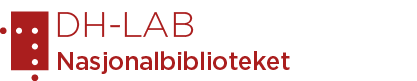

## Oppstart

In [1]:
from dhlab.module_update import update, css
import dhlab.nbtext as nb
from dhlab.nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import dhlab.graph_networkx_louvain as gnl
import dhlab.token_map as tm
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


In [2]:
import warnings
warnings.filterwarnings('ignore')

css()

## Navn i bøker

Finn en bok.

In [3]:

# Fetch URNs

urns = nb.book_urn(author = 'mykle%',  title = '%røde%', limit=100)
urns

[[2009033100094, 'Mykle, Agnar', 'Sangen om den røde rubin', 2002],
 [2008100104083, 'Mykle, Agnar', 'Sangen om den røde rubin', 1998],
 [2007052404016, 'Mykle, Agnar', 'Sangen om den røde rubin', 1967],
 [2008111304085, 'Mykle, Agnar', 'Sangen om den røde rubin', 2001],
 [2008021104029, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2009011504069, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2008021404040, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2016020808126, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2015090129001, 'Mykle, Agnar', 'Sangen om den røde rubin', 1956]]

Her ønsker vi den komplette, så vi kan bruke kommandoen `book_count()` for å få antallet ord i hver bok.

In [4]:
[nb.book_count(x) for x in urns]

[{2009033100094: 157494},
 {2008100104083: 157073},
 {2007052404016: 169245},
 {2008111304085: 157197},
 {2008021104029: 157204},
 {},
 {2008021404040: 157148},
 {2016020808126: 156998},
 {2015090129001: 157449}]

Vi legger URN-en i en variabel. Det gjør det lettere å gjøre endringer, og kjøre notebooken på andre bøker.

In [5]:
BOOK = 2015090129001

## Navn

Navn er alt som starter med store bokstaver, men som også forekommer utenom punktum. Kommando er  'names()'.

In [6]:
wp = nb.names(BOOK, cutoff=15)
tm.show_names(wp)

Lag 1

    Ask - 872
    Daniel - 120
    Doffen - 116
    Gud - 88
    Embla - 86
    Robert - 67
    Constance - 64
    Økonomiske - 48
    Eirik - 46
    Fiffolo - 45
    Wilhelmine - 42
    Norge - 39
    Stabell - 38
    Molly - 37
    Floden - 35
    Stallen - 33
    Francis - 29
    Wolfgang - 28
    Sosialistisk - 26
    Tyskland - 26
    Burlefot - 23
    Sangen - 23
    Abrahamsen - 22
    Poppi - 22
    Studentersamfunnet - 22
    Studentlag - 22
    Taraldsen - 22
    Frankrike - 20
    Gunnhild - 20
    Hm - 18
    Maia - 18
    Vil - 17
    Hitler - 16

Lag 2

    Eirik Floden - 23
    Francis Stabell - 22
    Sosialistisk Studentlag - 20
    Ask Burlefot - 15
    Gud Gud - 1

Lag 3


Lag 4




Noe kan fjernes, enkelte ord dukker opp som ikke er navn.

In [7]:
tm.token_map(wp)

[(('Abrahamsen',), ('Abrahamsen',)),
 (('Ask',), ('Ask', 'Burlefot')),
 (('Burlefot',), ('Ask', 'Burlefot')),
 (('Constance',), ('Constance',)),
 (('Daniel',), ('Daniel',)),
 (('Doffen',), ('Doffen',)),
 (('Eirik',), ('Eirik', 'Floden')),
 (('Embla',), ('Embla',)),
 (('Fiffolo',), ('Fiffolo',)),
 (('Floden',), ('Eirik', 'Floden')),
 (('Francis',), ('Francis', 'Stabell')),
 (('Frankrike',), ('Frankrike',)),
 (('Gud',), ('Gud', 'Gud')),
 (('Gunnhild',), ('Gunnhild',)),
 (('Hitler',), ('Hitler',)),
 (('Hm',), ('Hm',)),
 (('Maia',), ('Maia',)),
 (('Molly',), ('Molly',)),
 (('Norge',), ('Norge',)),
 (('Poppi',), ('Poppi',)),
 (('Robert',), ('Robert',)),
 (('Sangen',), ('Sangen',)),
 (('Sosialistisk',), ('Sosialistisk', 'Studentlag')),
 (('Stabell',), ('Francis', 'Stabell')),
 (('Stallen',), ('Stallen',)),
 (('Studentersamfunnet',), ('Studentersamfunnet',)),
 (('Studentlag',), ('Sosialistisk', 'Studentlag')),
 (('Taraldsen',), ('Taraldsen',)),
 (('Tyskland',), ('Tyskland',)),
 (('Vil',), ('V

## Lag navnegrafen

Kommando er `make_network_name(<URN>, <liste over ord>)` fra modulen `token_map`

In [8]:
graf = tm.make_network_name_graph(BOOK, tokens=wp)

Vis grafen med `show_graph`

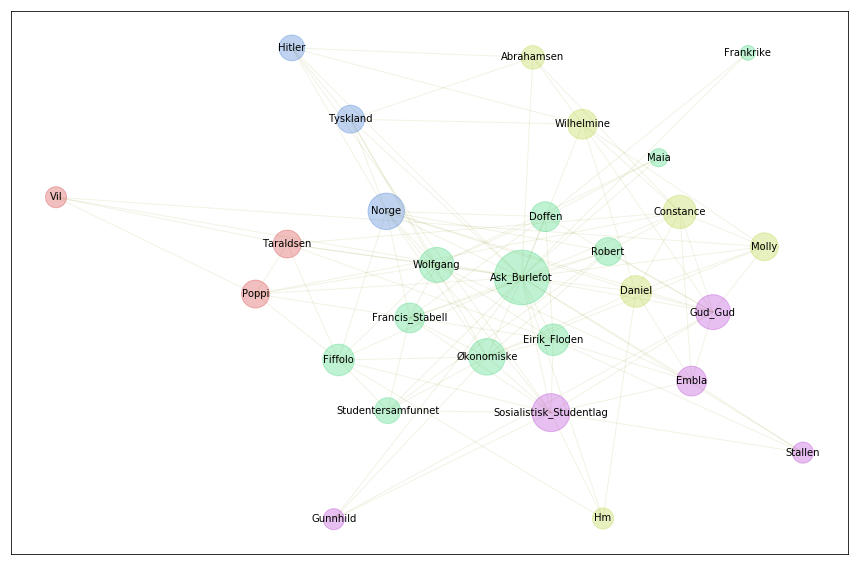

In [9]:
gnl.show_graph(graf, spread=1.8)

## Studer hvordan navnene henger sammen

In [10]:
gnl.show_communities(graf)

Constance-Daniel :  Constance, Daniel, Wilhelmine, Molly, Abrahamsen, Hm

Ask_Burlefot-Økonomiske :  Ask_Burlefot, Økonomiske, Wolfgang, Eirik_Floden, Fiffolo, Francis_Stabell, Doffen, Robert, Studentersamfunnet, Maia, Frankrike

Norge-Tyskland :  Norge, Tyskland, Hitler

Sosialistisk_Studentlag-Gud_Gud :  Sosialistisk_Studentlag, Gud_Gud, Embla, Stallen, Gunnhild

Taraldsen-Poppi :  Taraldsen, Poppi, Vil



Clustrene kan brukes til historieplotting (se også kapittel narrative grafer)

In [11]:
gcom = gnl.community_dict(graf)
gcom

{'Constance-Daniel': ['Constance',
  'Daniel',
  'Wilhelmine',
  'Molly',
  'Abrahamsen'],
 'Ask_Burlefot-Økonomiske': ['Ask_Burlefot',
  'Økonomiske',
  'Wolfgang',
  'Eirik_Floden',
  'Fiffolo',
  'Francis_Stabell',
  'Doffen',
  'Robert',
  'Studentersamfunnet',
  'Hm',
  'Maia',
  'Frankrike'],
 'Norge-Tyskland': ['Norge', 'Tyskland', 'Hitler'],
 'Sosialistisk_Studentlag-Gud_Gud': ['Sosialistisk_Studentlag',
  'Gud_Gud',
  'Embla',
  'Stallen',
  'Gunnhild'],
 'Taraldsen-Poppi': ['Taraldsen', 'Poppi', 'Vil']}

Henter ut vekstdiagrammet med `plot_book_wordbags(<urn>, <ordsekker>, window=<..>)` og plotter med `plot`.

In [12]:
wp_diagram = nb.plot_book_wordbags(BOOK, gcom,window = 5000)

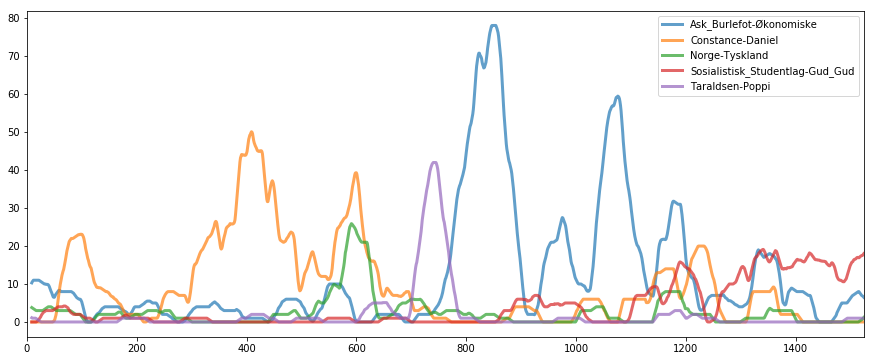

In [13]:
plot(wp_diagram.rolling(window=10).mean());